El siguiente código utiliza el conjunto de datos "Financial Indicators of US stocks", para entrenar modelos de aprendizaje supervisado. Este conjunto de datos consiste en más de 200 indicadores financieros para distintas acciones, además de dos objetivos: clasificación (¿convenía comprar la acción?) y regresión (¿cuánto varió el precio de la acción?). Puede encontrar más información de este set de datos en: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

In [3]:
!unzip us_stocks_indicators.zip

Archive:  us_stocks_indicators.zip
  inflating: us_stocks_indicators.csv  


In [4]:
df = pd.read_csv('us_stocks_indicators.csv')
df

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,1,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,1,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,1,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,1,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,1,8.886701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11561,2018,-0.321902,-0.056913,-0.260997,-0.362659,-0.176558,-0.323253,-0.348420,-0.304556,-0.364943,...,-0.125742,-0.162893,-0.296377,-0.077211,-0.087938,-0.180232,-0.427595,5.0,1,11.671183
11562,2018,-0.320430,-0.063498,-0.260046,-0.360389,-0.176558,-0.318976,-0.345646,-0.303842,-0.362495,...,0.014435,0.037725,-0.239226,-0.070337,-0.094344,-0.180232,0.118168,3.0,0,-3.076927
11563,2018,-0.319299,-0.057232,-0.260687,-0.355165,-0.176558,-0.311366,-0.338340,-0.304045,-0.359536,...,-0.004627,-0.162893,-0.254331,-0.089822,-0.109306,-0.180232,-0.319253,2.0,1,27.118650
11564,2018,-0.322487,-0.338482,-0.260997,-0.364521,-0.166454,-0.322009,-0.345954,-0.314653,-0.364943,...,0.017639,-0.162893,-0.774404,-0.624742,-0.087647,-0.088512,-0.786892,0.0,0,-77.922077


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2], test_size=0.3, random_state=0)

In [6]:
def train_and_test(model, X_train, Y_train, X_test, Y_test):
  model.fit(X_train, Y_train)
  predicted = model.predict(X_test)
  print(f'Confusion matrix:\n {metrics.confusion_matrix(Y_test, predicted)}')
  print(f'Accuracy: {metrics.accuracy_score(Y_test, predicted)}')

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=0)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 909  556]
 [ 463 1542]]
Accuracy: 0.7063400576368876


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 781  684]
 [ 514 1491]]
Accuracy: 0.6547550432276658


In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 820  645]
 [ 669 1336]]
Accuracy: 0.6213256484149856


In [9]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


In [11]:
import umap

um = umap.UMAP()
X_2d = um.fit_transform(X_train)

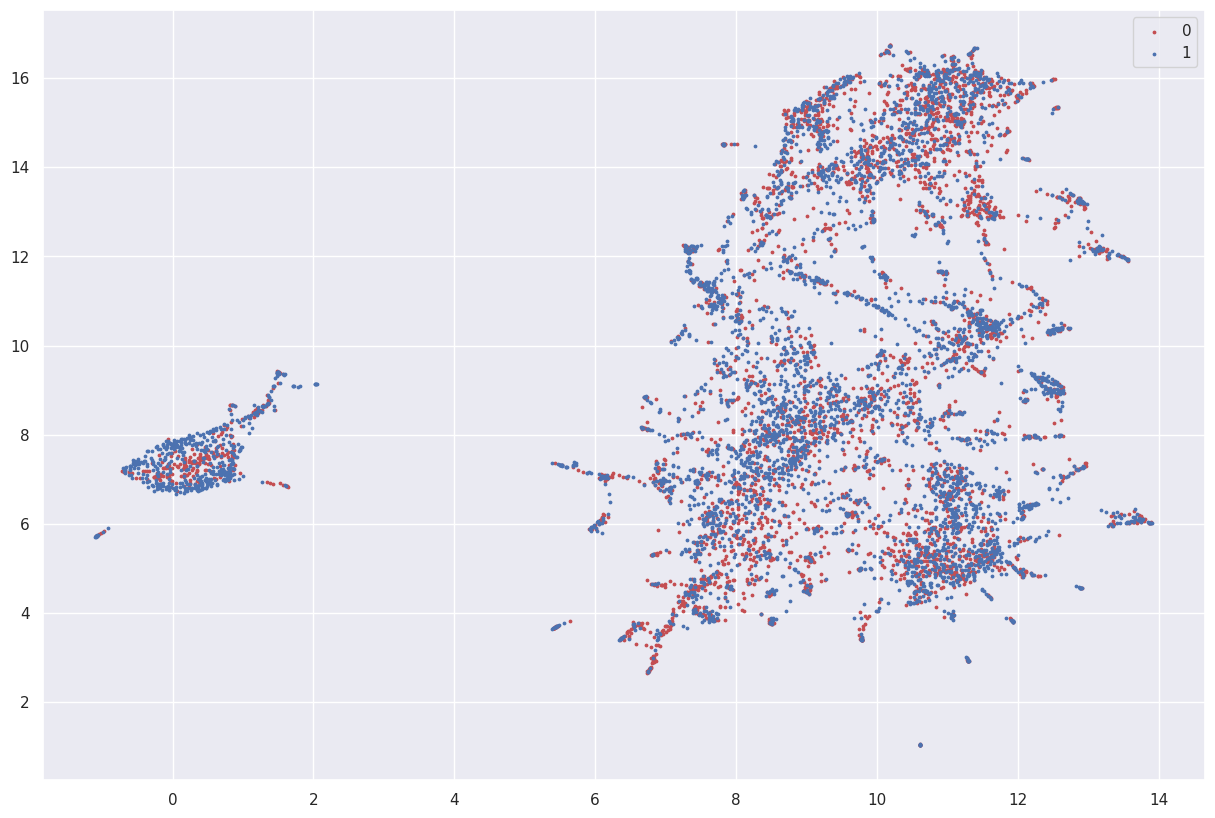

In [12]:
plt.scatter(X_2d[Y_train == 0,0], X_2d[Y_train == 0,1], c='r', label = '0', s=3)
plt.scatter(X_2d[Y_train == 1,0], X_2d[Y_train == 1,1], c='b', label = '1', s=3)
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 685  780]
 [ 646 1359]]
Accuracy: 0.5890489913544669


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 914  551]
 [ 513 1492]]
Accuracy: 0.693371757925072
